In [34]:
import os
print(os.getcwd())

C:\Users\xvpow\python20230710\20230821


In [6]:
import os
try:
    os.chdir("./Media")
except:
    print("無法轉換")
print(os.getcwd())

C:\Users\xvpow\python20230710\20230821\Media


In [1]:
import os
print(os.listdir())
print(os.listdir("./TestDir"))

['.ipynb_checkpoints', 'Media', 'TestDir', 'Untitled.ipynb']
['t1', 't2']


In [76]:
from  os import listdir
from os.path import isfile,isdir,join
myPath = "./TestDir"
files = listdir()
for f in files:
    print(join(myPath,f))
    if isfile(f):
        print("我是檔案",f)
    elif isdir(f):  
         print("我是目錄",f)
    else:
         print("我是其他",f)

./TestDir\.ipynb_checkpoints
我是目錄 .ipynb_checkpoints
./TestDir\Ch13.ipynb
我是檔案 Ch13.ipynb
./TestDir\data.json
我是檔案 data.json
./TestDir\data.txt
我是檔案 data.txt
./TestDir\data0.json
我是檔案 data0.json
./TestDir\data1.txt
我是檔案 data1.txt
./TestDir\example.csv
我是檔案 example.csv
./TestDir\example1.csv
我是檔案 example1.csv
./TestDir\example2.csv
我是檔案 example2.csv
./TestDir\json與csv用檔案.zip
我是檔案 json與csv用檔案.zip
./TestDir\Media
我是目錄 Media
./TestDir\mydir
我是目錄 mydir
./TestDir\result-readline.txt
我是檔案 result-readline.txt
./TestDir\score.json
我是檔案 score.json
./TestDir\score.txt
我是檔案 score.txt
./TestDir\test.py
我是檔案 test.py
./TestDir\TestDir
我是目錄 TestDir
./TestDir\TestDir.zip
我是檔案 TestDir.zip
./TestDir\TestDir2
我是目錄 TestDir2
./TestDir\text2.txt
我是檔案 text2.txt
./TestDir\ttest.csv
我是檔案 ttest.csv


In [23]:
from os import walk
myPath = "./TestDir"
for root,dirs,files in walk(myPath):
    print("root:",root)
    print("目錄:",dirs)
    print("檔案:",files)

root: ./TestDir
目錄: ['t1', 't2']
檔案: []
root: ./TestDir\t1
目錄: []
檔案: ['t1_1.txt']
root: ./TestDir\t2
目錄: ['t2_1', 't2_2']
檔案: []
root: ./TestDir\t2\t2_1
目錄: []
檔案: []
root: ./TestDir\t2\t2_2
目錄: []
檔案: ['t2_2_1.txt']


In [33]:
import os
dirPath = r".\mydir2"
if not os.path.exists(dirPath):
    os.mkdir(dirPath)
else:
    print(dirPath,"已存在不可建立")

In [ ]:
import os
os.chdir("./Media")
print(os.getcwd())
os.mkdir("./mydir")
os.chdir("../")
print(os.getcwd())

## 檔案存取

file object = open(file_name [, access_mode])

UTF8 編碼資料還請加入另一個參數才可避免亂碼：encoding=‘utf-8'
file object = open(file_name [, access_mode])

參數說明

file_name：file_name 參數是一個字串資料，代表包含要連結的文件名稱。

access_mode：access_mode 確定文件必須打開的模式，包括讀取、寫入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為讀取(r)。

|模式	|可做操作|若檔案不存在|是否覆蓋|
|----|--------|-----------|-------|
|r	|只能讀|報錯	|-|
|r+	|可讀可寫|報錯|是|
|w	|只能寫|建立|是|
|w+ |可讀可寫|建立|是|
|a　|只能寫|建立|否，追加寫|
|a+	|可讀可寫|建立|否，追加寫|


In [38]:
text = """python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。
"""
file = open("score.txt","w",encoding="utf-8")
file.write(text)
file.close()

In [41]:
file2 = open("score.txt","r",encoding="utf-8")
text = file2.read()
#text = file2.read(5)
print(text)

python與中文AAA
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。



## 關於檔案關閉動作
+ 檔案開啟後須進行 close( ) 方法進行關閉動作。
+ 若檔案沒關閉會造成：
  + 開啟的文件物件會占用系統資源。
  + Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
  + 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [46]:
import os
class tryopenfile:
    def openfile(self,filePath):
        self.handle = open(filePath,'w')
        #self.handle.close()
    pass
t = tryopenfile()
filePath = 'test.txt'
#建立文件物件
t.openfile(filePath)
#刪除文件 PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'
os.remove(filePath)
print('success')

PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'

## With 方式操作檔案
+ 多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
+ 以 with 方式操作檔案：
  + 檔案存取仍有可能產生 IO 例外。
  + 離開 with 區塊時檔案將會自動進行 close( ) 動作，自動關閉檔案。

In [48]:
import os
class tryopenfile:
    def openfile(self,filePath):
        with open(filePath,'w') as f: #自動關閉檔案。
            self.handle = f 
t = tryopenfile()
filePath = 'test.txt'
#建立文件物件
t.openfile(filePath)
#刪除文件 PermissionError: [WinError 32] 程序無法存取檔案，因為檔案正由另一個程序使用。: 'test.txt'
os.remove(filePath)
print('success')

success


In [50]:
with open("text2.txt","w") as file2:
    file2.write("Python\n")
    file2.write("Java")
    

## 壓縮與解壓縮
### 但可以於Python程式內運用，可實現以下功能：
#### 建立zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的write()動作將資料夾壓縮。
#### 解壓縮zip壓縮檔案
+ 透過zipfile.ZipFile( )建立物件，再透過物件的extractall()動作解壓縮。
#### 列出zip壓縮檔案內容
+透過zipfile.ZipFile( )建立物件，再透過物件的namelist()動作查看。

In [58]:
import zipfile
def create_zip(path):
  zf = zipfile.ZipFile('{}.zip'.format(path), 'w', zipfile.ZIP_DEFLATED)
  for root, dirs, files in os.walk(path):
    for file_name in files:
      zf.write(os.path.join(root, file_name))
def ziplist(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  print(zf.namelist())
def extra_zip(file_path):
  zf = zipfile.ZipFile(file_path, 'r')
  zf.extractall()

try:
    create_zip("TestDir")
except:
    print("壓縮失敗")
    
try:
    ziplist("TestDir.zip")
except:
    print("查看失敗")



['TestDir/t1/t1_1.txt', 'TestDir/t2/t2_2/t2_2_1.txt']


In [ ]:
try:
    extra_zip("TestDir.zip")
except:
    print("解壓失敗")

## CSV
+ CSV 格式是資料庫最常用的導入和導出格式。
+ 資料均沒有類型，一切都是字串。
+ 沒有字體或顏色與儲存格寬度高度的設置。
+ Python 語法必須加入 import csv。
+ 讀取儲存格資料：
  + reader( )：依照每一列的編號 由0開始
  + DictReader( )
    + 以第一列的值為每一行的名稱，第一列不是資料
    + 也可以重新命名，但第一列必須是資料


In [67]:
import csv
with open("example1.csv","r",encoding="utf-8") as f:
    for row in csv.reader(f):
        if float(row[5]) > 100:
            print(row[0],row[1])

 104/01/03 2,640,781,030
 104/01/17 3,720,277,205
 104/01/30 4,540,373,544
 104/01/31 5,486,734,180


In [66]:
import csv
with open("example.csv","r",encoding="utf-8") as f:
    for row in csv.DictReader(f):
        if float(row["漲跌點數"]) > 9.34:
            print(row["漲跌點數"])

101.17
29.59
47.89
85.83
117.46
12.61
173.72
109.67


### JSON
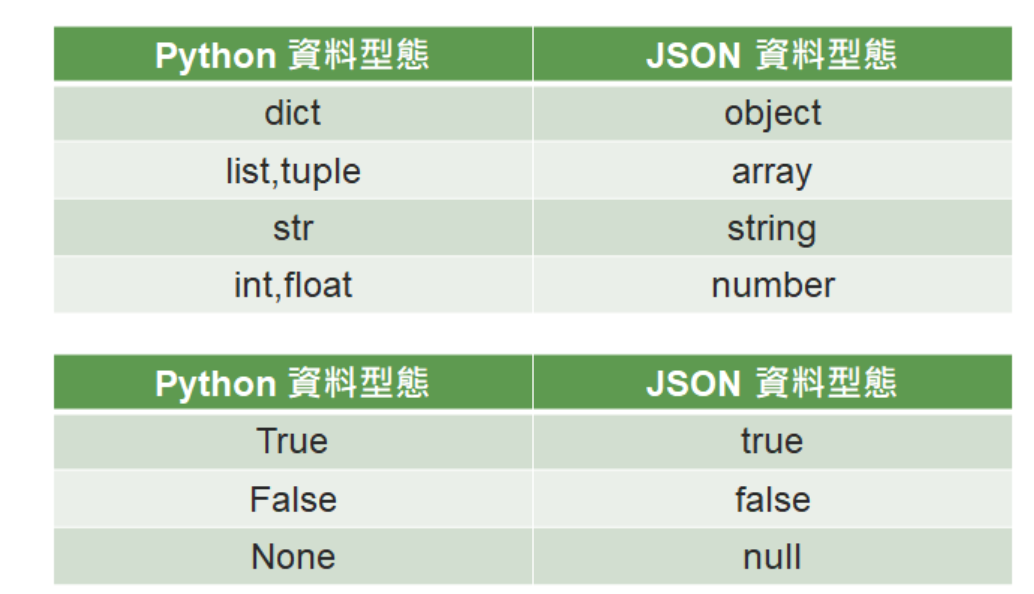

In [68]:
import json
json1 = {'python':'課程','gjun':100,'python-class':True,'ICQ':None}
json2 = json.dumps(json1,ensure_ascii=False)
print(json2)

{"python": "課程", "gjun": 100, "python-class": true, "ICQ": null}
